In [2]:
import pandas as pd
import numpy as np
from plotnine import *

# Rolle 2018 WRR - Exp a Scenarios 1 and 2

## Concentration and activities plots

In [3]:
## reading results
# os.getcwd()
results1 = pd.read_csv('data/rolle2018-1Da.csv', sep = '\t', skipinitialspace=True)
results1 = results1.drop([0,1])
results1 = results1.iloc[:, :-1]
results1

,time,dist,H,Mg2,Cl,gammaH,gammaMg2,gammaCl,potential,current
2,0,0.0005,0.100000,1.000000e+00,2.100000,0.94583,0.79114,0.94111,0.000000,0.0
3,0,0.0015,0.100000,1.000000e+00,2.100000,0.94583,0.79114,0.94111,0.000000,0.0
4,0,0.0025,0.100000,1.000000e+00,2.100000,0.94583,0.79114,0.94111,0.000000,0.0
5,0,0.0035,0.100000,1.000000e+00,2.100000,0.94583,0.79114,0.94111,0.000000,0.0
6,0,0.0045,0.100000,1.000000e+00,2.100000,0.94583,0.79114,0.94111,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
1557,43200,0.1155,0.000131,3.932000e-17,0.000047,0.99961,0.99842,0.99960,0.076494,0.0
1558,43200,0.1165,0.000121,1.369000e-17,0.000032,0.99962,0.99849,0.99962,0.078137,0.0
1559,43200,0.1175,0.000113,4.803100e-18,0.000021,0.99964,0.99855,0.99964,0.079477,0.0
1560,43200,0.1185,0.000107,1.636000e-18,0.000011,0.99965,0.99859,0.99965,0.080588,0.0


In [4]:
results1.melted = pd.melt(results1, id_vars = ['dist', 'time'])
results1.melted['scenario'] = '1'
results1.melted

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,dist,time,variable,value,scenario
0,0.0005,0,H,0.1,1
1,0.0015,0,H,0.1,1
2,0.0025,0,H,0.1,1
3,0.0035,0,H,0.1,1
4,0.0045,0,H,0.1,1
...,...,...,...,...,...
12475,0.1155,43200,current,0.0,1
12476,0.1165,43200,current,0.0,1
12477,0.1175,43200,current,0.0,1
12478,0.1185,43200,current,0.0,1


In [5]:
## reading results
# os.getcwd()
results2 = pd.read_csv('data/rolle2018-1Db.csv', sep = '\t', skipinitialspace=True)
results2 = results2.drop([0,1])
results2 = results2.iloc[:, :-1]

#melting
results2.melted = pd.melt(results2, id_vars = ['dist', 'time'])
results2.melted['scenario'] = '2'
results2.melted

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,dist,time,variable,value,scenario
0,0.0005,0,H,0.100000,2
1,0.0015,0,H,0.100000,2
2,0.0025,0,H,0.100000,2
3,0.0035,0,H,0.100000,2
4,0.0045,0,H,0.100000,2
...,...,...,...,...,...
10915,0.1155,43200,potential,0.006701,2
10916,0.1165,43200,potential,0.011353,2
10917,0.1175,43200,potential,0.016500,2
10918,0.1185,43200,potential,0.022603,2


In [6]:
#merge dataframes

results = pd.merge(results1.melted, results2.melted, how = 'outer')
results


,dist,time,variable,value,scenario
0,0.0005,0,H,0.100000,1
1,0.0015,0,H,0.100000,1
2,0.0025,0,H,0.100000,1
3,0.0035,0,H,0.100000,1
4,0.0045,0,H,0.100000,1
...,...,...,...,...,...
23395,0.1155,43200,potential,0.006701,2
23396,0.1165,43200,potential,0.011353,2
23397,0.1175,43200,potential,0.016500,2
23398,0.1185,43200,potential,0.022603,2


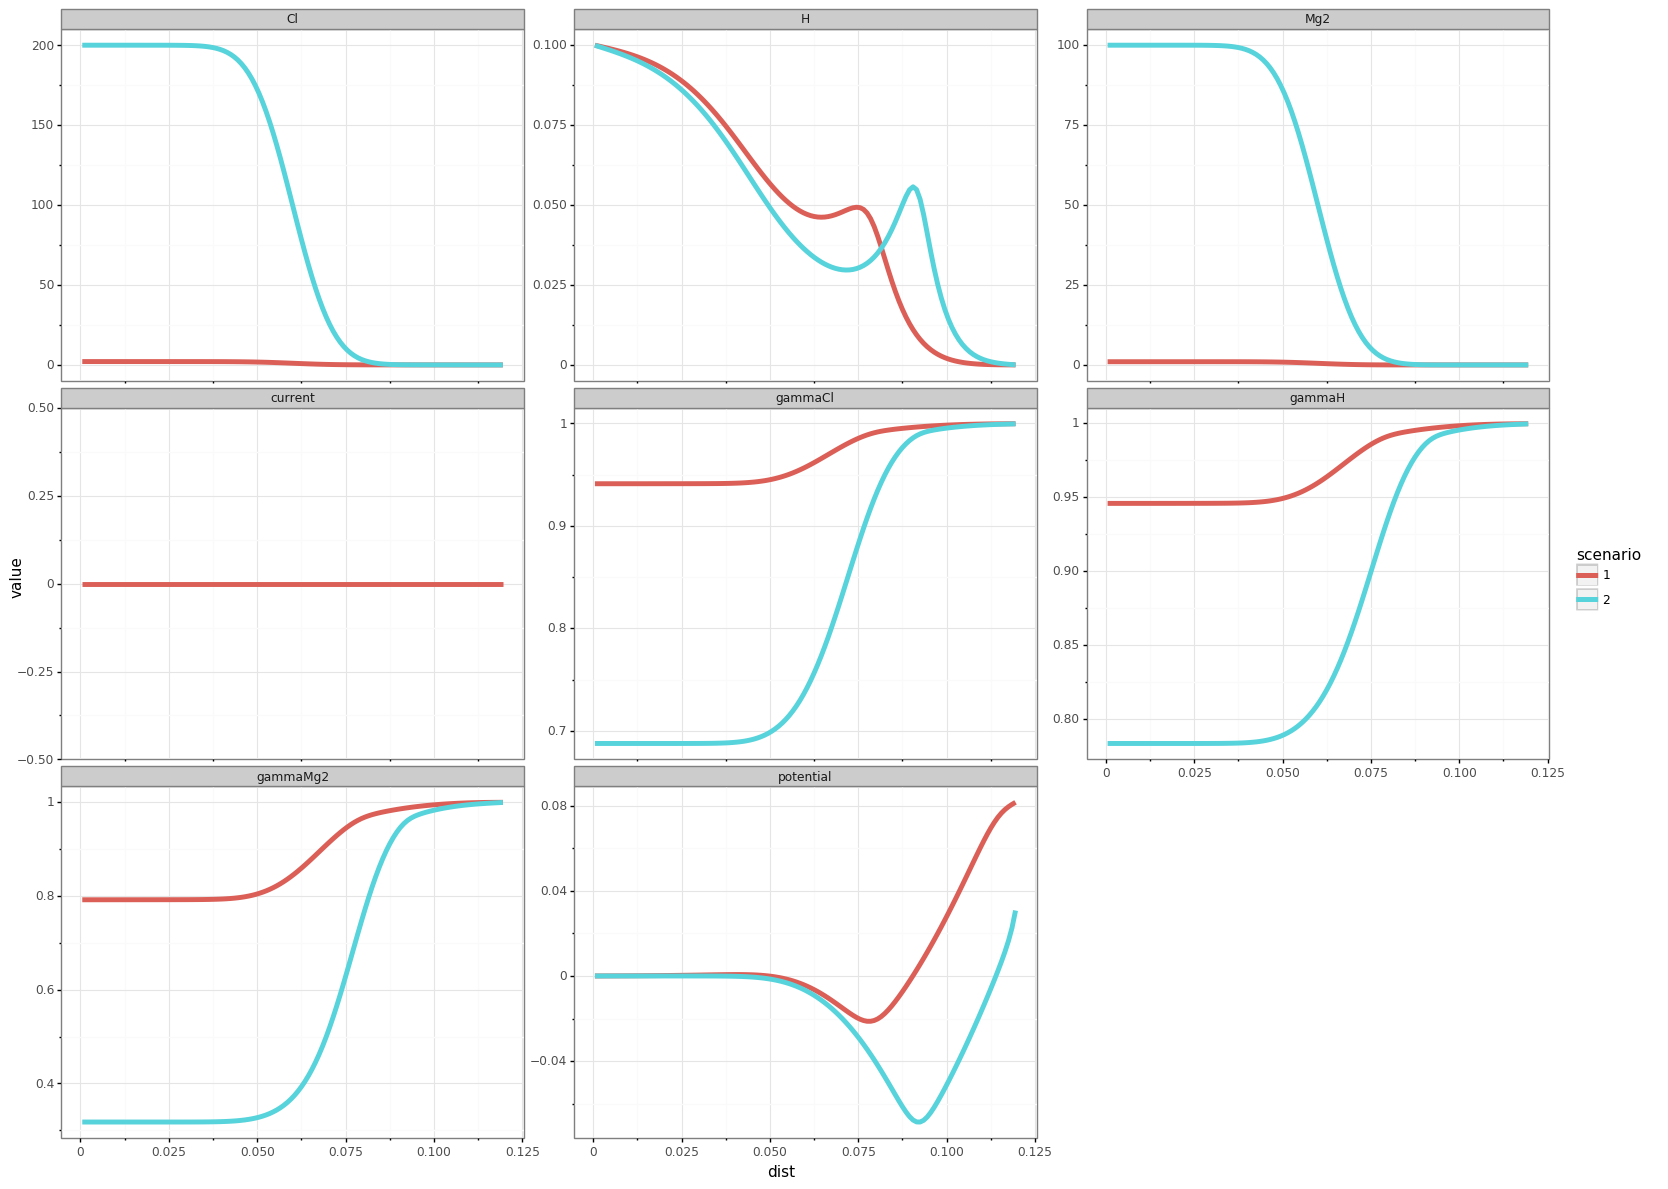

<ggplot: (-9223371958530906287)>

In [7]:
from plotnine import *

# options.figure_size = (6.4*2, 4.8*2)

(ggplot(results[results['time'] == 43200], aes('dist', 'value', color='scenario'))
 + geom_line(size = 2)
 + facet_wrap('~variable', ncol = 3, scales= 'free_y')
 + theme_bw() + theme(figure_size = (6.4*3, 4.8*3), panel_spacing_x = 0.5)
 ) 

## Fluxes calculations

In [ ]:
#diffusion coeficients
D_H = 8.65E-9
D_Mg = 0.63E-9
D_Cl = 1.81E-9

#valence
z_H = 1 
z_Mg = 2
z_Cl = -1

dx1 = np.gradient(results1.dist)[0]
dx2 = np.gradient(results2.dist)[0]
if dx1 != dx2: 
    import sys
    sys.exit("aa! errors!")
else: dx = dx1

#Faraday number, Temperature in Kelvins (25C) and R = Gases constant

F = 96485.33212 #C mol−1
R = 8.3145 #J⋅K−1⋅mol−1.
T = 293.15 #K
def fluxes_calc(group):
    #log activity columns
    group['log10gammaH'] = np.log10(group['gammaH'])
    group['log10gammaMg2'] = np.log10(group['gammaMg2'])
    group['log10gammaCl'] = np.log10(group['gammaCl'])

    #diffusion fluxes
    group['jdif_Mg2'] = -1*D_Mg*(group['Mg2'].diff()/dx)
    group['jdif_H'] = -1*D_H*(group['H'].diff()/dx)
    group['jdif_Cl'] = -1*D_Cl*(group['Cl'].diff()/dx)
    
    #activity fluxes
    group['jact_Mg2'] = -1*D_Mg*(group['Mg2']/dx)*group['log10gammaMg2'].diff()
    group['jact_H'] = -1*D_Mg*(group['H']/dx)*group['log10gammaH'].diff()
    group['jact_Cl'] = -1*D_Mg*(group['Cl']/dx)*group['log10gammaCl'].diff()
    
    #electromigration fluxes
    group['jmig_Mg2'] = -1*D_Mg*z_Mg*(group['Mg2']/dx)*group['potential'].diff()*F/(R*T)
    group['jmig_H'] = -1*D_H*z_H*(group['H']/dx)*group['potential'].diff()*F/(R*T)
    group['jmig_Cl'] = -1*D_Cl*z_Cl*(group['Cl']/dx)*group['potential'].diff()*F/(R*T)
    
    group['jtot_Mg2'] = group['jdif_Mg2'] + group['jact_Mg2'] + group['jmig_Mg2']
    group['jtot_Cl'] = group['jdif_Cl'] + group['jact_Cl'] + group['jmig_Cl']
    group['jtot_H'] = group['jdif_H'] + group['jact_H'] + group['jmig_H']
    

    return group

fluxes1 = results1.groupby(['time']).apply(fluxes_calc)
fluxes2 = results2.groupby(['time']).apply(fluxes_calc)

fluxes1 = fluxes1[['time', 'dist', 'jdif_Mg2', 'jdif_H', 'jdif_Cl', 'jact_Mg2', 
               'jact_H', 'jact_Cl', 'jmig_Mg2', 'jmig_H', 'jmig_Cl', 
                 'jtot_Mg2', 'jtot_H', 'jtot_Cl']]

fluxes2 = fluxes2[['time', 'dist', 'jdif_Mg2', 'jdif_H', 'jdif_Cl', 'jact_Mg2', 
               'jact_H', 'jact_Cl', 'jmig_Mg2', 'jmig_H', 'jmig_Cl', 
                 'jtot_Mg2', 'jtot_H', 'jtot_Cl']]
fluxes1

In [ ]:
fluxes1_melted = pd.melt(fluxes1, id_vars = ['time', 'dist'])
fluxes1_melted['scenario'] = 1
fluxes2_melted = pd.melt(fluxes2, id_vars = ['time', 'dist'])
fluxes2_melted['scenario'] = 2

fluxes = pd.merge(fluxes1_melted, fluxes2_melted, how = 'outer')

fluxes['ion'] = fluxes['variable'].str[5:]
fluxes['flux_type'] = fluxes['variable'].str[1:4]
fluxes

In [ ]:
from mizani.formatters import scientific_format
sc1 = fluxes[(fluxes['time'] == 43200) & (fluxes['scenario'] == 1)]
(ggplot(sc1, aes('dist', 'value', color = 'flux_type'))
 + geom_line(size = 2)
 + facet_wrap('ion', scales= 'free', ncol =1)
 + scale_y_continuous(labels=scientific_format(digits=3))
 + theme_bw() + theme(figure_size = (6.4*2, 4.8*2), panel_spacing_x = 0.5)
 ) 

In [ ]:
from mizani.formatters import scientific_format
sc2 = fluxes[(fluxes['time'] == 43200) & (fluxes['scenario'] == 2)]
(ggplot(sc2, aes('dist', 'value', color = 'flux_type'))
 + geom_line(size = 2)
 + facet_wrap('ion', scales= 'free', ncol =1)
 + scale_y_continuous(labels=scientific_format(digits=3))
 + theme_bw() + theme(figure_size = (6.4*2, 4.8*2), panel_spacing_x = 0.5)
 ) 

# Rolle 2018 WRR - Exp b